# Airline On-Time Statistics and Delay Causes Data Exploration
## by Mohamed Hassan Badr

## Data Overview

> Dataset tracks the on-time performance of domestic flights operated by large air carriers in the United States, summary information on the number of on-time, delayed, canceled and diverted flights, and reasons for delays, from 2010 to 2020

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('airline_delay_causes.csv')

In [4]:
# high-level overview of data shape and composition
df.shape

(42063, 22)

In [5]:
df.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object

In [6]:
# View all the columns
pd.set_option('display.max_columns',500)

In [7]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,156.06,0.0,62.78,46.0,4.0,15932.0,4225.0,1098.0,6092.0,0.0,4517.0,NaN
1,2010,1,9E,Pinnacle Airlines Inc.,BOS,"Boston, MA: Logan International",87.0,16.0,1.97,0.84,9.19,0.0,4.01,2.0,1.0,1115.0,295.0,78.0,582.0,0.0,160.0,NaN
2,2010,1,9E,Pinnacle Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",21.0,6.0,2.36,0.00,3.64,0.0,0.00,1.0,0.0,180.0,70.0,0.0,110.0,0.0,0.0,NaN
3,2010,1,9E,Pinnacle Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",17.0,7.0,0.00,0.00,5.15,0.0,1.85,0.0,0.0,202.0,0.0,0.0,92.0,0.0,110.0,NaN
4,2010,1,9E,Pinnacle Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",35.0,6.0,3.00,0.00,1.19,0.0,1.81,1.0,1.0,449.0,207.0,0.0,34.0,0.0,208.0,NaN


## Cleaning Data

In [8]:
#Remove white spaces from columns labels
df.rename(columns = lambda x:x.strip().lower(),inplace = True)

In [9]:
# Drop rows with NaN values in total arrival flights column
df.dropna(subset=['arr_flights'],inplace = True)

In [10]:
# Fill NaN values in delaying arrived flights with zeros
df['arr_del15'].fillna(0, inplace = True)

In [11]:
# Add new column for flights that didn't arrive on time
df.insert(7, 'not_on_time_flights',df['arr_del15'] + df['arr_cancelled'] + df['arr_diverted'],allow_duplicates=False)

In [12]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,not_on_time_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 21
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,321.0,271.0,42.76,9.40,156.06,0.0,62.78,46.0,4.0,15932.0,4225.0,1098.0,6092.0,0.0,4517.0,NaN
1,2010,1,9E,Pinnacle Airlines Inc.,BOS,"Boston, MA: Logan International",87.0,19.0,16.0,1.97,0.84,9.19,0.0,4.01,2.0,1.0,1115.0,295.0,78.0,582.0,0.0,160.0,NaN
2,2010,1,9E,Pinnacle Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",21.0,7.0,6.0,2.36,0.00,3.64,0.0,0.00,1.0,0.0,180.0,70.0,0.0,110.0,0.0,0.0,NaN
3,2010,1,9E,Pinnacle Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",17.0,7.0,7.0,0.00,0.00,5.15,0.0,1.85,0.0,0.0,202.0,0.0,0.0,92.0,0.0,110.0,NaN
4,2010,1,9E,Pinnacle Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",35.0,8.0,6.0,3.00,0.00,1.19,0.0,1.81,1.0,1.0,449.0,207.0,0.0,34.0,0.0,208.0,NaN


### What is the structure of your dataset?

There are 42,063 observation in the dataset with 22 features. Numeric variables are (year, month, arr_flights, arr_del15, carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct, arr_cancelled, arr_diverted, arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay)and Categorical variables are(carrier, carrier_name, airport, airport_name).

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out:
1. The number of the flights that didn't arrive on time along the years.
2. The duration of delaying flights for each airport because of security reasons.
3. The duration of delaying flights for each carrier because of carrier reasons.
4. The duration of delaying flights for each month because of weather reasons.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that year feature will effect on the total number of delaying flights, airport feature will effect on security delaying duration, carrier feature will effect on carrier delaying duration, month feature effect on weather delaying duration and the weather delaying duration will effect on the total duration of delaying flights.

## Univariate Exploration



I'll start by looking at the distribution of the main variable of interest: Delaying Arrived Duration.

In [13]:
df['arr_delay'].describe()

count     42041.000000
mean      11601.827097
std       21992.998002
min           0.000000
25%        1118.000000
50%        3690.000000
75%       11140.000000
max      429194.000000
Name: arr_delay, dtype: float64

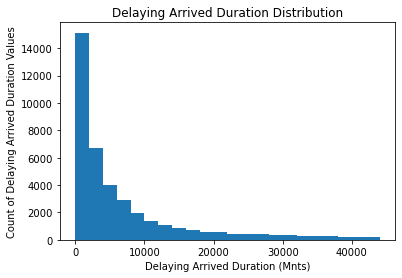

In [15]:
# start with a standard-scaled plot
bin_edges = np.arange(0, 43000+2000, 2000)
plt.hist(data = df, x = 'arr_delay', bins = bin_edges);
plt.title('Delaying Arrived Duration Distribution')
plt.xlabel('Delaying Arrived Duration (Mnts)')
plt.ylabel('Count of Delaying Arrived Duration Values');

In [14]:
np.log10(df['arr_delay'].describe())

C:\Users\M-Hassan\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    4.623673
mean     4.064526
std      4.342284
min          -inf
25%      3.048442
50%      3.567026
75%      4.046885
max      5.632654
Name: arr_delay, dtype: float64

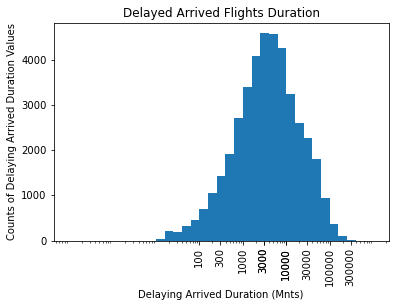

In [16]:
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = 10**np.arange(-1, 6 + 0.2, 0.2)
ticks = [100,300,1000,3000,10000, 3000, 10000, 30000, 100000, 300000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x ='arr_delay', bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels, rotation = 90);
plt.title('Delayed Arrived Flights Duration')
plt.xlabel('Delaying Arrived Duration (Mnts)')
plt.ylabel('Counts of Delaying Arrived Duration Values');

Delayind arrived duration has a long-tailed distribution, with a lot of observations at the low delaying minutes end, and few on the high delaying minutes end. When plotted on a log-scale, the delaying arrived minutes distribution looks roughly normal distributed, with one peak at about 3000 minutes.

Then investigate number of delaying arrived flights

In [16]:
df['not_on_time_flights'].describe()

count    42041.000000
mean       209.460764
std        370.357426
min          0.000000
25%         24.000000
50%         73.000000
75%        209.000000
max       6098.000000
Name: not_on_time_flights, dtype: float64

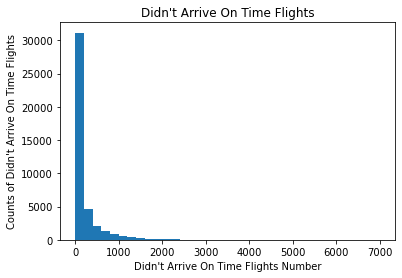

In [17]:
# start with a standard-scaled plot
bins_edges = np.arange(0, 7000+200, 200)
plt.hist(data = df, x = 'not_on_time_flights', bins = bins_edges);
plt.title("Didn't Arrive On Time Flights")
plt.xlabel("Didn't Arrive On Time Flights Number")
plt.ylabel("Counts of Didn't Arrive On Time Flights");

In [18]:
np.log10(df['not_on_time_flights'].describe())

count    4.623673
mean     2.321103
std      2.568621
min          -inf
25%      1.380211
50%      1.863323
75%      2.320146
max      3.785187
Name: not_on_time_flights, dtype: float64

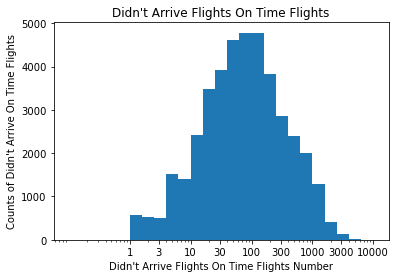

In [18]:
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = 10**np.arange(-1, 4 + 0.2, 0.2)
ticks = [1,3,10,30,100,300,1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x ='not_on_time_flights', bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title("Didn't Arrive Flights On Time Flights")
plt.xlabel("Didn't Arrive Flights On Time Flights Number")
plt.ylabel("Counts of Didn't Arrive On Time Flights");

Number of delaying arrived flights has a long-tailed distribution, with a lot of observations at the low delaying flights end, and few on the high delaying flights end. When plotted on a log-scale, the delaying arrived minutes distribution looks roughly normal distributed, with one peak between 100 and 300 flights.

Then investigate the distribution of the airports in the dataset

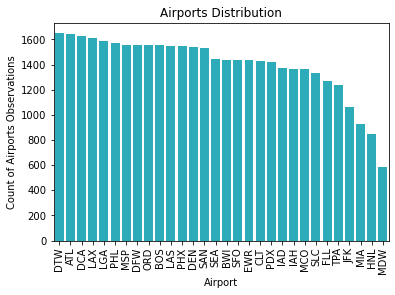

In [19]:
base_color = sb.color_palette()[9]
airport_order = df['airport'].value_counts().index
sb.countplot(data = df, x = 'airport', color = base_color, order = airport_order);
plt.xticks(rotation = 90);
plt.title('Airports Distribution');
plt.xlabel('Airport')
plt.ylabel('Count of Airports Observations');

From airports distribution, found that most airports have nearly air traffic, DTW airport has the air traffic and MDW airport has the least air traffic in the dataset.

Then investigate the distribution of the carriers in the dataset

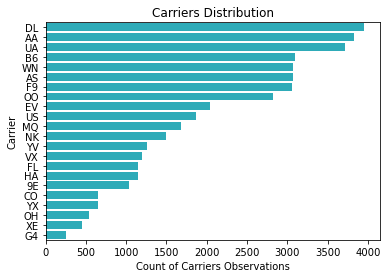

In [20]:
carrier_order = df['carrier'].value_counts().index
sb.countplot(data = df, y = 'carrier', color = base_color, order = carrier_order);
plt.title('Carriers Distribution');
plt.ylabel('Carrier')
plt.xlabel('Count of Carriers Observations');

From carriers distribution, found that DL Airlines has the most air traffic and G4 has the least air traffic in the dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The delayind arrived duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal distributed, with one peak at about 3000 minutes.

The delayed arrived flight numbers variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal distributed, with one peak between 100 and 300 flights.

From airports distribution, found that most airports have nearly air traffic, DTW airport has the air traffic and MDW airport has the least air traffic in the dataset.

From carriers distribution, found that DL Airlines has the most air traffic and G4 has the least air traffic in the dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. Remove white spaces from columns labels for tideness.
2. Drop rows with NaN values in total arrival flights column for tideness.
3. Fill NaN values in delaying arrived flights with zeros for tideness.
4. Add new column for total flights that didn't arrive on time which is the sum of delayed, diverted and cancelled flights to figure out this variable.

## Bivariate Exploration



To start to look at the pairwise correlations present between features in the data.

In [22]:
numeric_vars_flights = ['not_on_time_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted']
numeric_vars_minutes = ['arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

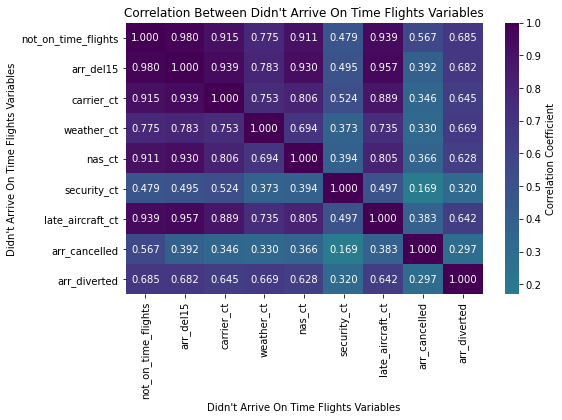

In [34]:
# flights correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars_flights].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0, cbar_kws = {'label':"Correlation Coefficient"})
plt.title("Correlation Between Didn't Arrive On Time Flights Variables");
plt.xlabel("Didn't Arrive On Time Flights Variables")
plt.ylabel("Didn't Arrive On Time Flights Variables");
plt.show()

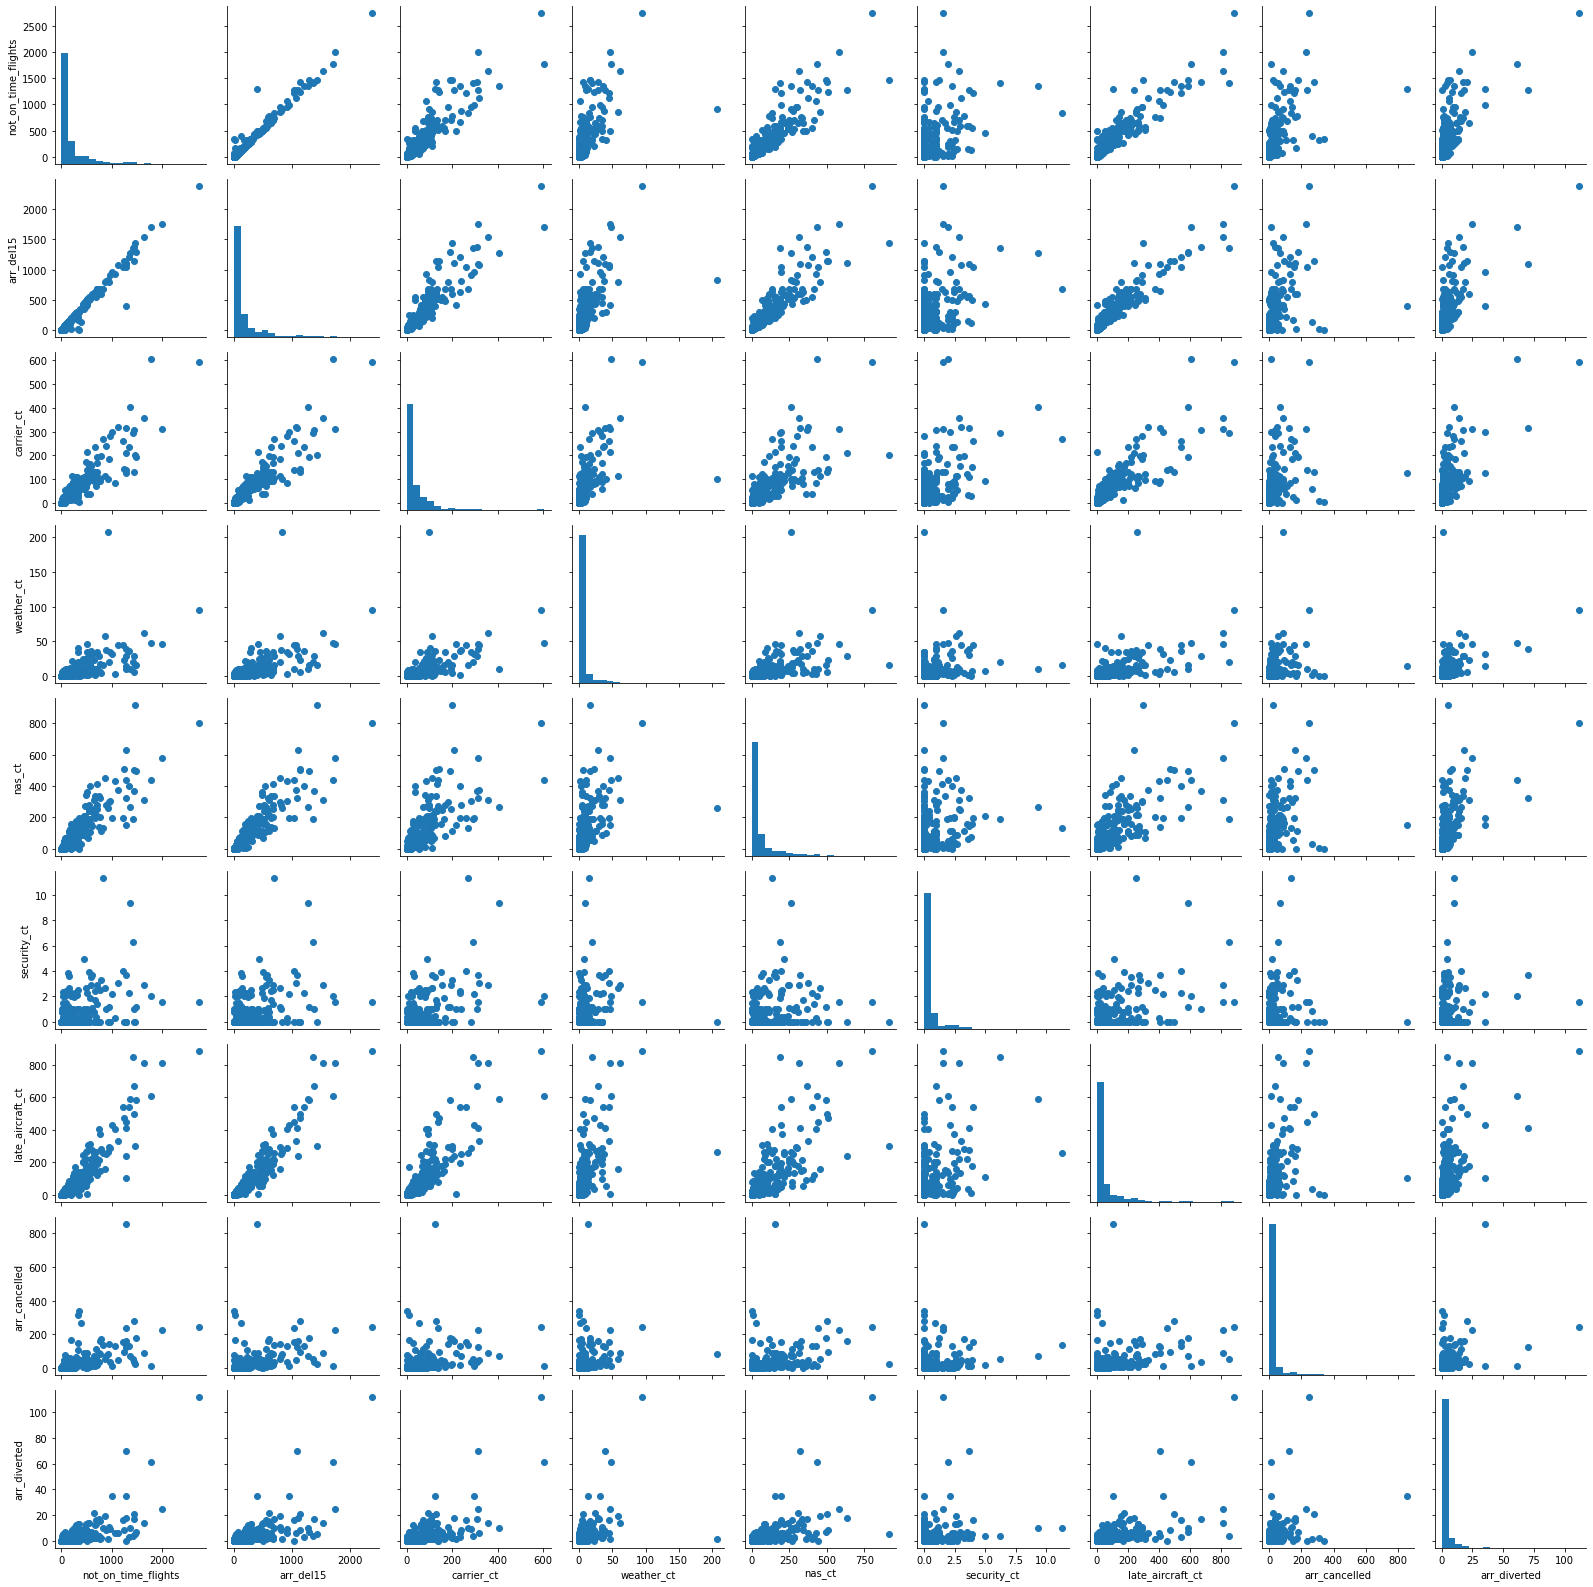

In [24]:
# plot matrix: sample 500, so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars_flights)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As expected, found the highest relation of the flights didn't arrive on time with the delayed flights then diverted flights and the lowest with the cancelled flights.
And the highest relation of the delayed flights with the lated previous aircraft while the lowest relation with security reasons.

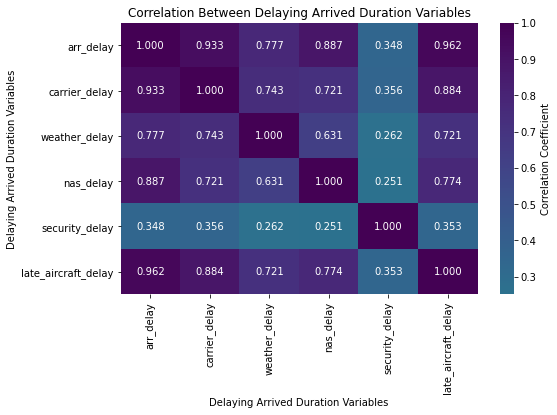

In [35]:
# Duration correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars_minutes].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0, cbar_kws = {'label':"Correlation Coefficient"})
plt.title('Correlation Between Delaying Arrived Duration Variables')
plt.xlabel('Delaying Arrived Duration Variables')
plt.ylabel('Delaying Arrived Duration Variables')
plt.show()

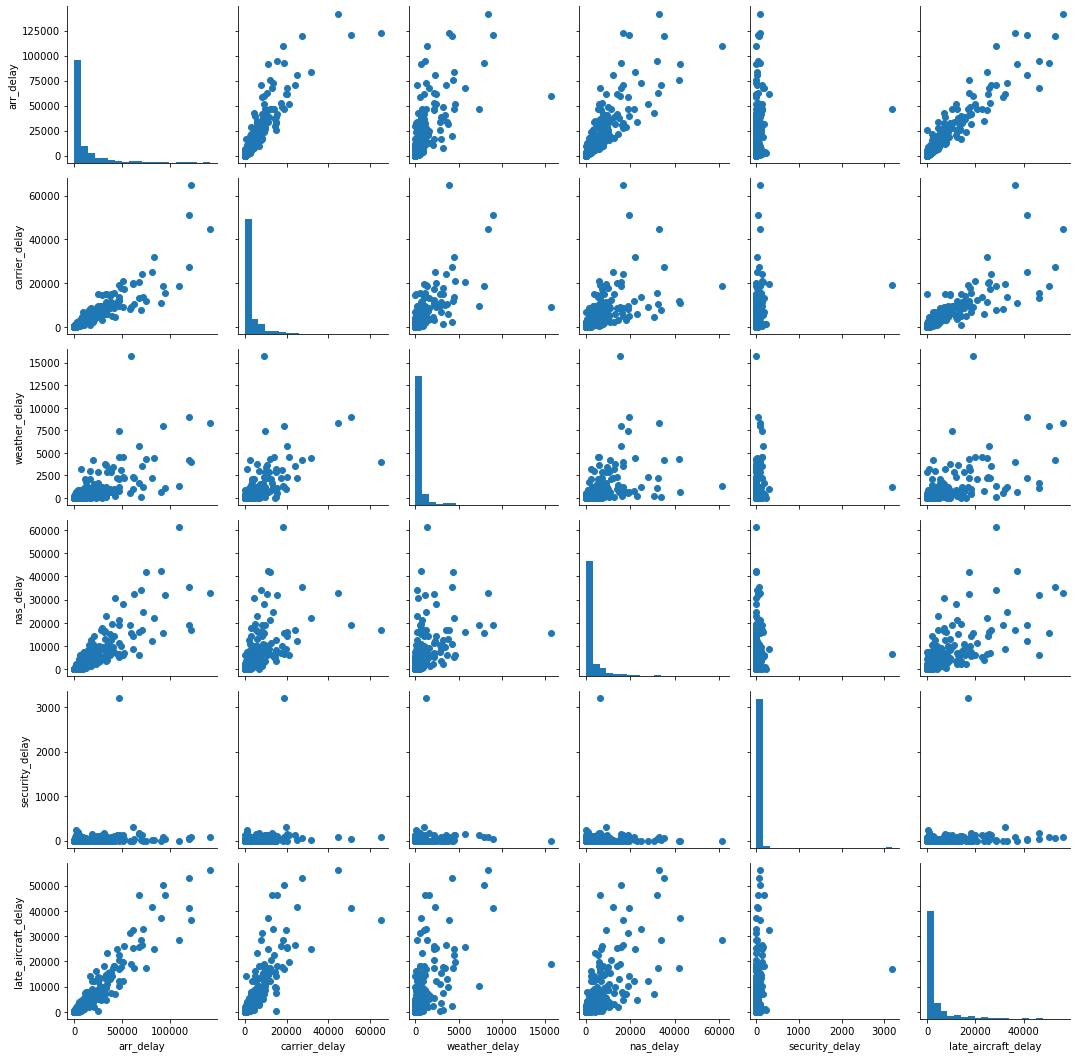

In [26]:
g = sb.PairGrid(data = df_samp, vars = numeric_vars_minutes)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As expected from the previous investegation of the flights number, found the highest relation of the delayed flights duration with the lated previous aircraft while the lowest relation with security reasons.

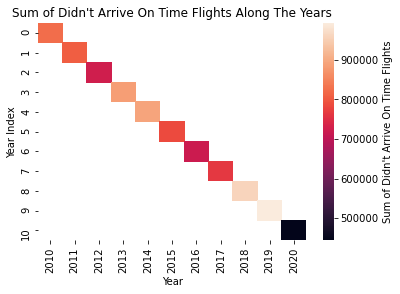

In [37]:
# Figuring out the flights didn't arrive on the time along years.
year_not = df.groupby('year').sum()['not_on_time_flights']
year_not = year_not.reset_index(name = 'not_on_time_flights_sum').pivot(columns = 'year', values = 'not_on_time_flights_sum')
sb.heatmap(year_not, cbar_kws = {'label':"Sum of Didn't Arrive On Time Flights"});
plt.title("Sum of Didn't Arrive On Time Flights Along The Years");
plt.xlabel('Year')
plt.ylabel('Year Index');

Found unexpected result, the most sum of the flights didn't arrive on time on 2020, which is stranger result at which the logical expected result that the delayed flights are decreased along the time by treating the reasons of delaying.

So will investigate this point with the mean parameter.

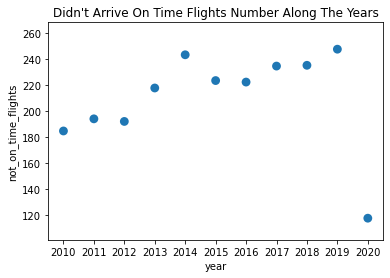

In [26]:
sb.pointplot(data = df, x = 'year', y = 'not_on_time_flights', linestyles = " ", errwidth = 0);
plt.title("Didn't Arrive On Time Flights Number Along The Years");

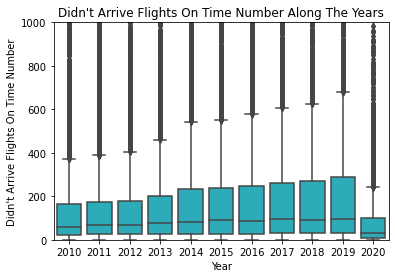

In [51]:
sb.boxplot(data = df, x = 'year', y = 'not_on_time_flights', color = base_color);
plt.ylim((0,1000));
plt.title("Didn't Arrive Flights On Time Number Along The Years")
plt.xlabel('Year')
plt.ylabel("Didn't Arrive Flights On Time Number");

Found that the least mean of flights didn't arrive on time at 2020 with a lot of outliers, but also found the max number of flights are increased along the time with approximately the same mean.

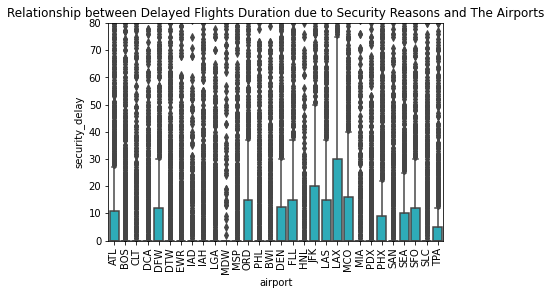

In [27]:
# Figuring out the delaying arrived flights duration due to security reasons at airports.
sb.boxplot(data = df, x = 'airport', y = 'security_delay', color = base_color);
plt.xticks(rotation = 90);
plt.ylim((0,80));
plt.title("Relationship between Delayed Flights Duration due to Security Reasons and The Airports");

Box plot summery statistics results are not clear.

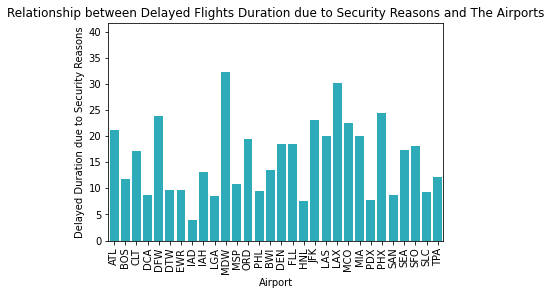

In [50]:
sb.barplot(data = df, x = 'airport', y = 'security_delay', color = base_color, errwidth = 0);
plt.xticks(rotation = 90);
plt.title("Relationship between Delayed Flights Duration due to Security Reasons and The Airports")
plt.xlabel('Airport')
plt.ylabel("Delayed Duration due to Security Reasons");

Found that the most mean of delayed flights duration due to security reasons at MDW airport while the least mean at IAD airport. 

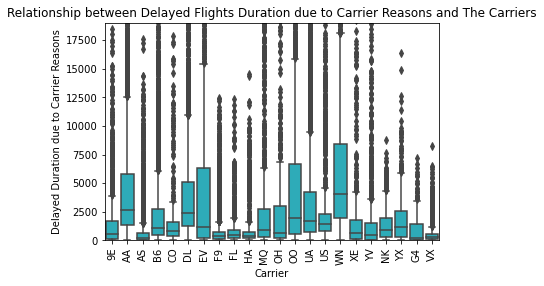

In [52]:
# Figuring out the delaying arrived flights duration due to carrier reasons from carriers.
sb.boxplot(data = df, x = 'carrier', y = 'carrier_delay', color = base_color);
plt.xticks(rotation = 90);
plt.ylim((0,19000));
plt.title("Relationship between Delayed Flights Duration due to Carrier Reasons and The Carriers")
plt.xlabel('Carrier')
plt.ylabel("Delayed Duration due to Carrier Reasons");

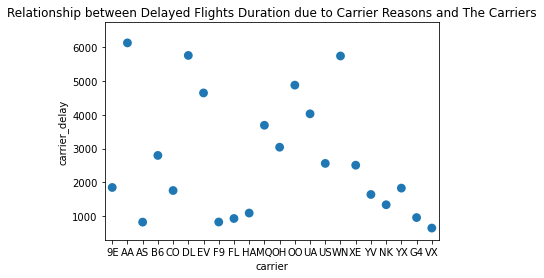

In [28]:
sb.pointplot(data = df, x = 'carrier', y = 'carrier_delay', linestyles = " ", errwidth = 0);
plt.title("Relationship between Delayed Flights Duration due to Carrier Reasons and The Carriers");

Found that the most statistics of delayed flights duration due to carrier reasons from WN airlines, while the least statistics from VX airlines. 

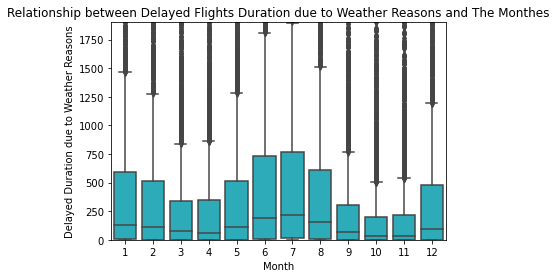

In [53]:
# Figuring out the delaying arrived flights duration due to weather reasons at months.
sb.boxplot(data = df, x = 'month', y = 'weather_delay', color = base_color);
plt.ylim((0,1900));
plt.title("Relationship between Delayed Flights Duration due to Weather Reasons and The Monthes")
plt.xlabel('Month')
plt.ylabel("Delayed Duration due to Weather Reasons");

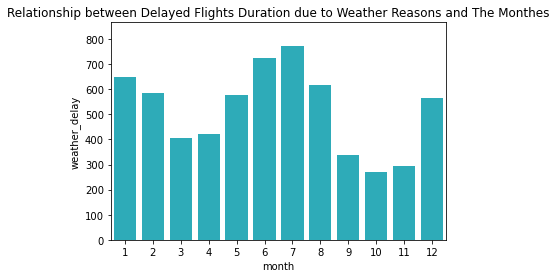

In [29]:
sb.barplot(data = df, x = 'month', y = 'weather_delay', color = base_color, errwidth = 0);
plt.title("Relationship between Delayed Flights Duration due to Weather Reasons and The Monthes");

Found that the most statistics of delayed flights duration due to weather reasons at july, while the least statistics at october.

### Talk about some of the relationships that observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

By figuring out that MDW airport is the most airport has delayed flights duration due to security reasons should be directed to this airport to improve its security performance to  decrease its delaying flights duration.

By Figuring out that WN airlines is the most carrier has delayed flights duration due to carrier reasons should be indicated for this carrier to improve its facilities to decrease its delaying flights duration.

By figuring out that july is the most month has delayed flights duration due to weather reasons can help for planning the air traffic in this month.


### Did observe any interesting relationships between the other features (not the main feature(s) of interest)?

The surpricing interesting relationship was the number of flights didn't arrive on time along the years , suppose that these flights number are decreased along the time by treating the reasons of delaying and working to improve the delaying feature and minimuze the number of delaying arrived flights and their duration, but this it doesn't happend along the ten year from 2010 to 2020 in the dataset


## Multivariate Exploration


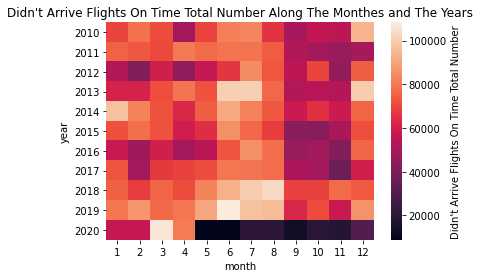

In [55]:
# # Figuring out the flights didn't arrive on the time along years taking months variable into consideration. 
year_not = df.groupby(['year', 'month']).sum()['not_on_time_flights']
year_not = year_not.reset_index(name = 'not_on_time_flights_sum').pivot(index = 'year', columns = 'month', values = 'not_on_time_flights_sum')
sb.heatmap(year_not, cbar_kws = {'label':"Didn't Arrive Flights On Time Total Number"});
plt.title("Didn't Arrive Flights On Time Total Number Along The Monthes and The Years");

Found that the most sum of flights didn't arrive on time in duration from may 2020 to december 2020.

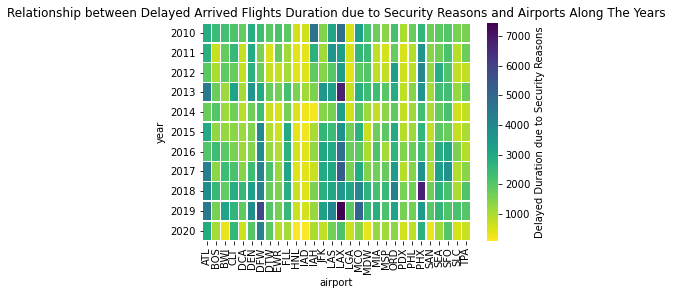

In [59]:
# Figuring out the delaying arrived flights duration due to security reasons at airports.
airport_rank = df.groupby(['airport', 'year']).sum()['security_delay']
airport_rank = airport_rank.reset_index(name = 'total_mints').pivot(index = 'year',columns = 'airport', values = 'total_mints')
sb.heatmap(airport_rank, cbar_kws = {'label':'Delayed Duration due to Security Reasons'}, cmap = 'viridis_r',linewidths=.5, xticklabels = True);
plt.title('Relationship between Delayed Arrived Flights Duration due to Security Reasons and Airports Along The Years');

Found that MDW airport which has most delaying arrived duration due to security reasons at bivariate relationship has neutral distribution along the ten years while other airports have more delaying duration at specific years like LAX airport at 2013 and 2019 and PHX airport at 2018.

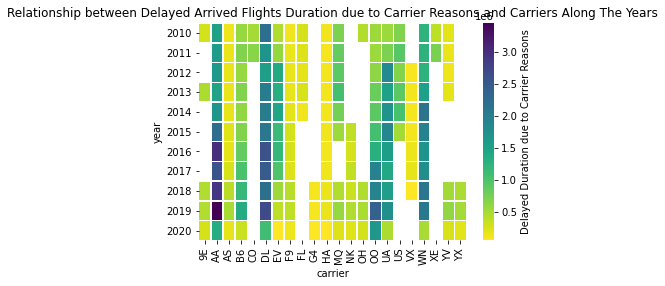

In [60]:
# Figuring out the delaying arrived flights duration due to carrier reasons from carriers along years.
carrier_rank = df.groupby(['carrier', 'year']).sum()['carrier_delay']
carrier_rank = carrier_rank.reset_index(name = 'total_mints').pivot(index = 'year',columns = 'carrier', values = 'total_mints')
sb.heatmap(carrier_rank, cbar_kws = {'label':'Delayed Duration due to Carrier Reasons'}, cmap = 'viridis_r',linewidths=.5, xticklabels = True);
plt.title('Relationship between Delayed Arrived Flights Duration due to Carrier Reasons and Carriers Along The Years');

Found that WN airlines which has most delaying arrived duration due to carrier reasons at bivariate relationship has relatively high distribution along the ten years while other carriers have more delaying duration at specific years like AA carrier at 2016 and 2019.

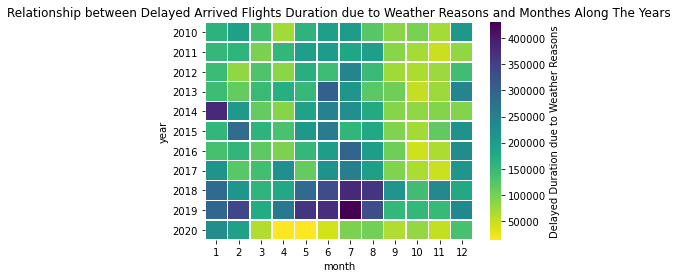

In [61]:
# Figuring out the delaying arrived flights duration due to weather reasons at months along years.
weather_rank = df.groupby(['month', 'year']).sum()['weather_delay']
weather_rank = weather_rank.reset_index(name = 'total_mints').pivot(index = 'year',columns = 'month', values = 'total_mints')
sb.heatmap(weather_rank, cbar_kws = {'label':'Delayed Duration due to Weather Reasons'}, cmap = 'viridis_r',linewidths=.5, xticklabels = True);
plt.title('Relationship between Delayed Arrived Flights Duration due to Weather Reasons and Monthes Along The Years');

Found that july which has most delaying arrived duration due to weather reasons at bivariate relationship has also the most distribution along the ten years specially at 2018 and 2019.

### Talk about some of the relationships that observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Although MDW airport has most delaying arrived duration due to security reasons at bivariate relationship, it has neutral distribution along the ten years while other airports have more delaying duration at specific years like LAX airport at 2013 and 2019 and PHX airport at 2018.
So these airports like LAX and PHX need also to improve their security performane to decrease its delaying flights duration.

Although WN airlines has most delaying arrived duration due to carrier reasons at bivariate relationship, it has relatively high distribution along the ten years while other carriers have more delaying duration at specific years like AA carrier at 2016 and 2019.
So this AA carrier need also to improve its facilities to decrease its delaying flights duration.



Still july is the most month has delayed flights duration due to weather reasons and need special planning for the air traffic in this month.

### Were there any interesting or surprising interactions between features?

The surpricing interesting relationship still was the number of flights didn't arrive on time along the years , suppose that these flights number are decreased along the time by treating the reasons of delaying and working to improve the delaying feature and minimuze the number of delaying arrived flights and their duration, but this it doesn't happend along the ten year from 2010 to 2020 in the dataset.
The max of these flights exactly between may 2020 and december 2020 (second half of 2020), which need deep investigation.
